In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, norm
import re

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 100
plt.style.use('ggplot')

In [226]:
# import raw data
df_raw = pd.read_csv('../Ames_HousePrice.csv', index_col=0).reset_index()
df_raw.drop('index', axis=1, inplace=True)

# copy raw data to new df
df = df_raw.copy()

In [227]:
# function to standardize column names
def camel_to_snake(name):
    name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()

In [228]:
# rename columns
df.rename(camel_to_snake, axis=1, inplace=True)

In [229]:
df.describe()

,pid,gr_liv_area,sale_price,ms_sub_class,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod_add,mas_vnr_area,bsmt_fin_sf1,bsmt_fin_sf2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,tot_rms_abv_grd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3_ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
count,2.580000e+03,2580.000000,2580.000000,2580.000000,2118.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2566.000000,2579.000000,2579.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2578.000000,2578.000000,2580.000000,2580.000000,2580.000000,2580.00000,2580.000000,2580.000000,2451.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,7.148300e+08,1486.039922,178059.623256,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,1983.751938,99.308262,444.346258,53.238852,539.101590,1036.686700,1144.975194,336.820155,4.244574,0.435221,0.062064,1.550775,0.378295,2.850388,1.04031,6.387209,0.604264,1976.982048,1.747577,466.842575,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,1.886626e+08,488.650181,75031.089374,42.802105,22.835831,8126.937892,1.367590,1.122008,29.719705,20.490242,175.872330,429.334957,174.423920,425.199639,418.555417,375.958955,424.072452,44.403603,0.518827,0.244513,0.545825,0.499237,0.822863,0.20255,1.535186,0.648604,24.659801,0.738678,207.476842,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.313630e+08,1112.000000,129975.000000,20.000000,57.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,215.000000,792.000000,871.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.00000,5.000000,0.000000,1960.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354546e+08,1436.000000,159900.000000,50.000000,68.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,384.000000,0.000000,448.000000,979.000000,1071.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.00000,6.000000,1.000000,1978.000000,2.000000,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071811e+08,1733.000000,209625.000000,70.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,158.000000,732.000000,0.000000,784.000000,1266.500000,1364.000000,703.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.00000,7.000000,1.000000,2000.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,2336.000000,3206.000000,3820.000000,1872.000000,1064.000000,3.000000,2.000000,4.000000,2.000000,6.000000,3.00000,13.000000,4.000000,2010.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              2580 non-null   int64  
 1   gr_liv_area      2580 non-null   int64  
 2   sale_price       2580 non-null   int64  
 3   ms_sub_class     2580 non-null   int64  
 4   ms_zoning        2580 non-null   object 
 5   lot_frontage     2118 non-null   float64
 6   lot_area         2580 non-null   int64  
 7   street           2580 non-null   object 
 8   alley            168 non-null    object 
 9   lot_shape        2580 non-null   object 
 10  land_contour     2580 non-null   object 
 11  utilities        2580 non-null   object 
 12  lot_config       2580 non-null   object 
 13  land_slope       2580 non-null   object 
 14  neighborhood     2580 non-null   object 
 15  condition1       2580 non-null   object 
 16  condition2       2580 non-null   object 
 17  bldg_type     

In [231]:
# variable types
unique = ['pid']

# years/months could be treated as discrete or nominal; depends on the objective;
discrete = ['bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', \
            'bedroom_abv_gr', 'kitchen_abv_gr', 'tot_rms_abv_grd', 'fireplaces', \
            'garage_yr_blt', 'garage_cars', 'mo_sold', 'yr_sold', \
            'year_built', 'year_remod_add']

continuous = ['sale_price', 'lot_frontage', 'lot_area', 'mas_vnr_area', \
              'bsmt_fin_sf1', 'bsmt_fin_sf2', 'bsmt_unf_sf', 'total_bsmt_sf', \
              '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', \
              'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', \
              '3_ssn_porch', 'screen_porch', 'pool_area', 'misc_val']

nominal = ['ms_zoning', 'street', 'alley', 'land_contour', \
           'lot_config', 'neighborhood', 'condition1', 'condition2', \
           'bldg_type', 'house_style', 'roof_style', 'roof_matl', \
           'exterior1st', 'exterior2nd', 'mas_vnr_type', 'foundation', \
           'heating', 'central_air', 'garage_type', 'misc_feature', \
           'sale_type', 'sale_condition', 'ms_sub_class']

ordinal = ['overall_qual', 'lot_shape', 'overall_cond', 'exter_qual', \
           'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', \
           'bsmt_fin_type1', 'bsmt_fin_type2', 'heating_qc', 'kitchen_qual', \
           'functional', 'fireplace_qu', 'garage_qual', 'garage_cond', \
           'pool_qc', 'utilities', 'land_slope', 'electrical', \
           'garage_finish', 'paved_drive', 'fence']

Notes on specific columns
- Is there any value in the second data set?
    Pulled addresses from this data set, may refer back for 2017-2020 house prices if necessary

- Alley - could change to binary?
     leave in for now
     
- Condition 1 & 2 - somehow combine?
    
- Year built/remod - convert to age at time of sale
- Exterior 1 & 2 - somehow combine?
- Basement Qual - HEIGHT of basement? ish?
- Basement Exposure - Good, Average, Minimum, No Exposure, None
- basement Quality and Sq Feet - look to combine
- porch square feet - look to combine
- year, month etc. - how to categorize? convert to age? 
- remodel - time since remodel or Y/N
- geocode - drop
- fence - maybe ordinal?
- lat/lng - missing 20. maybe we could infer by neighborhood?
- 'Street' 'LotShape' drop?

# Box Cox Transformation

In [232]:
# find optimal lambda
lam = boxcox(df.sale_price.values)[1]

In [233]:
# create new column bc_sale_price
df['bc_sale_price'] = (df['sale_price']**lam - 1)/lam

In [234]:
# plot normal overlay
mean_lsp = np.mean(df['bc_sale_price'])
sd_lsp = np.std(df['bc_sale_price'])
sd_lsp

0.29422170009901977

In [235]:
x_axis = np.arange(8,12,.01)
y_axis = norm.pdf(x_axis, mean_lsp, sd_lsp)

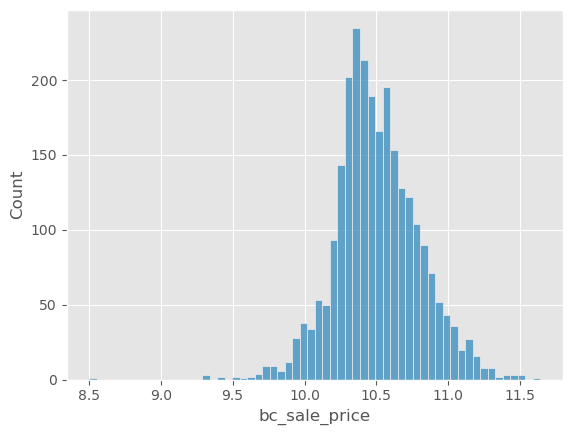

In [236]:
sns.histplot(data=df, x='bc_sale_price')
plt.show()

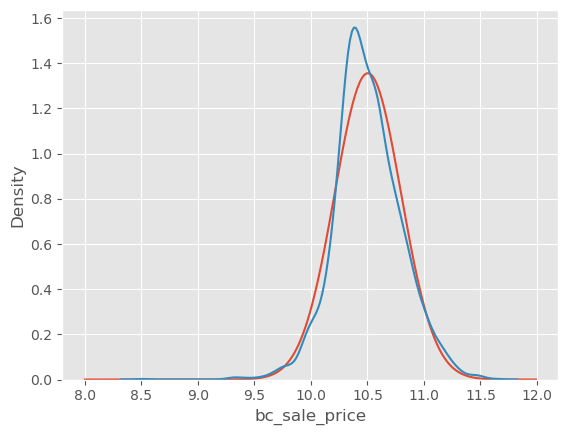

In [237]:
sns.lineplot(x=x_axis, y=y_axis)
sns.kdeplot(data=df, x='bc_sale_price')
plt.show()

# Data Cleanup

In [238]:
# remove duplicates
df.drop_duplicates(inplace=True)

## Fill NaNs

In [239]:
# function to find and list null values
def null_finder(df):
    keys = []
    na_counts = []
    values = []
    for col in df:
        na_count = df[col].isna().sum()
        if na_count > 0:
            keys.append(col)
            na_counts.append(na_count)
            values.append(df[col].unique().tolist())
        else:
            continue
    return pd.DataFrame({'feature':keys, 'null_count':na_counts, 'values':values}).sort_values(by='null_count', ascending=False)

In [240]:
null_finder(df)

,feature,null_count,values
24,pool_qc,2570,"[nan, Ex, Gd, Fa, TA]"
26,misc_feature,2482,"[nan, Shed, Othr, Gar2, TenC]"
1,alley,2411,"[nan, Pave, Grvl]"
25,fence,2054,"[nan, GdWo, MnPrv, GdPrv, MnWw]"
16,fireplace_qu,1241,"[Gd, nan, Ex, TA, Fa, Po]"
0,lot_frontage,462,"[nan, 42.0, 60.0, 80.0, 70.0, 64.0, 53.0, 74.0, 35.0, 48.0, 63.0, 62.0, 50.0, 68.0, 45.0, 65.0, ..."
23,garage_cond,129,"[TA, Po, nan, Fa, Gd, Ex]"
22,garage_qual,129,"[TA, nan, Fa, Gd, Po, Ex]"
19,garage_finish,129,"[Unf, Fin, RFn, nan]"
18,garage_yr_blt,129,"[1939.0, 1984.0, 1930.0, 1940.0, 2001.0, 2003.0, 1974.0, 2007.0, 2005.0, 1993.0, 1920.0, 1963.0,..."


### pool_qc
Pool Quality
- Ex - Excellent
- Gd - Good
- TA - Average/Typical
- Fa - Fair
- NA - No Pool

In [241]:
# cross-reference with Pool Area
df[df['pool_qc'].isna()]['pool_area'].value_counts(0)

0    2570
Name: pool_area, dtype: int64

In [242]:
# 0 pool area for all empty values, populate with NA
df['pool_qc'].fillna('NA', inplace=True)

### misc_feature
Miscellaneous feature not covered in other categories

In [243]:
df.misc_feature.value_counts()

Shed    88
Gar2     5
Othr     3
TenC     1
Name: misc_feature, dtype: int64

In [244]:
# fill empties with NA
df['misc_feature'].fillna('NA', inplace=True)

### alley
Type of alley access to property

In [245]:
df.alley.value_counts()

Grvl    105
Pave     63
Name: alley, dtype: int64

In [246]:
# fill empties with NA
df['alley'].fillna('NA', inplace=True)

### fence
Fence quality

In [247]:
df.fence.value_counts()

MnPrv    301
GdPrv    111
GdWo     103
MnWw      10
Name: fence, dtype: int64

In [248]:
# fill empties with NA
df['fence'].fillna('NA', inplace=True)

### fireplace_qu
Fireplace quality

In [249]:
# cross-reference with Number of fireplaces
df[df['fireplace_qu'].isna()]['fireplaces'].value_counts(0)

0    1241
Name: fireplaces, dtype: int64

In [250]:
# 0 fireplaces for all empty values, populate with NA
df['fireplace_qu'].fillna('NA', inplace=True)

### lot_frontage
Linear feet of street connected to property

r-value: 0.356788461402946


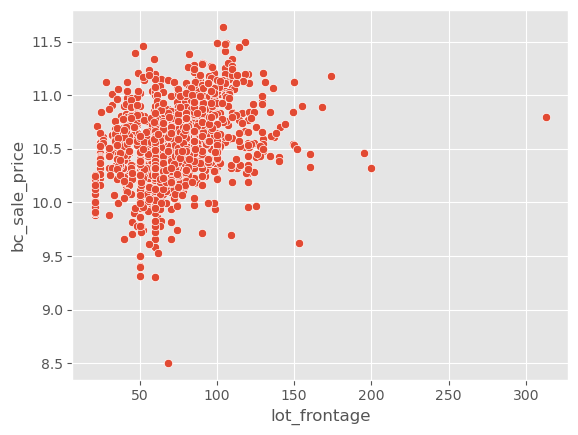

In [251]:
# examine relationship between lot_frontage & bc_sale_price
print(f'r-value: {df.lot_frontage.corr(df.bc_sale_price)}')
sns.scatterplot(data=df, x='lot_frontage', y='bc_sale_price')
plt.show()

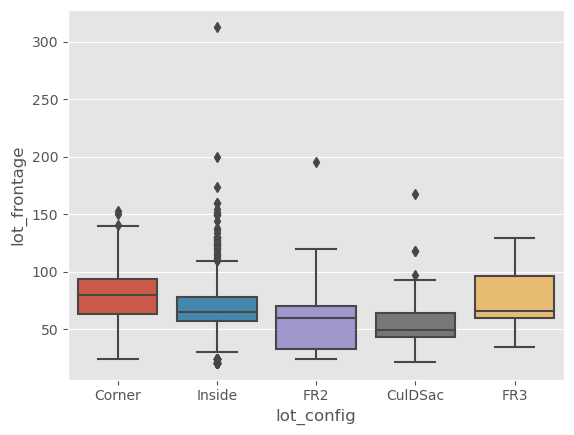

In [252]:
# look at relationship with lot config
sns.boxplot(data=df, x='lot_config', y='lot_frontage')
plt.show()

In [253]:
# view value distribution across lot config categories
print(df.lot_config.value_counts())
print(df[df['lot_frontage'].isna()]['lot_config'].value_counts(0))

Inside     1885
Corner      439
CulDSac     164
FR2          78
FR3          13
Name: lot_config, dtype: int64
Inside     261
Corner      95
CulDSac     83
FR2         20
FR3          3
Name: lot_config, dtype: int64


In [254]:
# find median for each lot config
df.groupby('lot_config')['lot_frontage'].agg('median')

lot_config
Corner     80.0
CulDSac    49.0
FR2        60.0
FR3        66.0
Inside     65.0
Name: lot_frontage, dtype: float64

In [255]:
# populate NaNs with median by lot config (resistant to outliers)
df.loc[(df.lot_frontage.isna()) & (df.lot_config == 'Corner'), 'lot_frontage'] = 80
df.loc[(df.lot_frontage.isna()) & (df.lot_config == 'CulDSac'), 'lot_frontage'] = 49
df.loc[(df.lot_frontage.isna()) & (df.lot_config == 'FR2'), 'lot_frontage'] = 60
df.loc[(df.lot_frontage.isna()) & (df.lot_config == 'FR3'), 'lot_frontage'] = 66
df.loc[(df.lot_frontage.isna()) & (df.lot_config == 'Inside'), 'lot_frontage'] = 65

### Garage Features
- garage_type
 - Garage location
- garage_cars
 - size of garage in car capacity
- garage_area
 - size of garage in sq ft
- garage_qual
 - Garage Quality
- garage_cond
 - Garage Condition
- garage_finish
 - Interior finish of the garage

In [256]:
# cross reference garage type with garage area
df[df['garage_type'].isna()]['garage_area'].value_counts(0)

0.0    127
Name: garage_area, dtype: int64

In [257]:
# populate NaNs with 'NA' for no garage
df['garage_type'].fillna('NA', inplace=True)

Where garage_type = 'NA'; populate remaining columns with appropriate values (NA)

In [258]:
# set garage_qual and garage_cond and garage_finish to NA
df.loc[(df.garage_qual.isna()) & (df.garage_type == 'NA'), 'garage_qual'] = 'NA'
df.loc[(df.garage_cond.isna()) & (df.garage_type == 'NA'), 'garage_cond'] = 'NA'
df.loc[(df.garage_finish.isna()) & (df.garage_type == 'NA'), 'garage_finish'] = 'NA'

Where there is a garage, but no quality, condition, or finisih; fill in with the mode for categorical and median for numeric

In [259]:
# categorical
df['garage_qual'].fillna(df.garage_qual.mode()[0], inplace=True)
df['garage_cond'].fillna(df.garage_cond.mode()[0], inplace=True)
df['garage_finish'].fillna(df.garage_finish.mode()[0], inplace=True)

# numeric
df['garage_cars'].fillna(df.garage_cars.median(), inplace=True)
df['garage_area'].fillna(df.loc[df.garage_cars == df.garage_cars.median()]['garage_area'].median(), inplace=True)

### Basement Features
- bsmt_qual - Evaluates the height of the basement
- bsmt_cond - Evaluates the general condition of the basement
- bsmt_exposure - refers to walkout or garden level walls
- bsmt_fin_type1 - Rating of basement finished area
- bsmt_fin_type2 - Rating of basement finished area (if multiple)
- bsmt_fin_sf1 - Type 1 finished sqft
- bsmt_fin_sf2 - Type 2 finished sqft
- bsmt_unf_sf - Unfinished square feet of basement area
- total_bsmt_sf - Total square feet of basement area
- bsmt_full_bath - Basement full bathrooms
- bsmt_half_bathrooms - Basement half bathrooms

In [260]:
# cross reference bsmt_qual with total_bsmt_sf
df[df['bsmt_qual'].isna()]['total_bsmt_sf'].value_counts(0)

0.0    68
Name: total_bsmt_sf, dtype: int64

In [261]:
# all are 0, populate NaNs with 'NA' for no basement
df['bsmt_qual'].fillna('NA', inplace=True)

In [262]:
# cross reference bsmt_cond with basement_qual
df[df['bsmt_cond'].isna()]['bsmt_qual'].value_counts(0)

NA    69
Name: bsmt_qual, dtype: int64

In [263]:
# all are NA, populate NaNs with 'NA' for no basement
df['bsmt_cond'].fillna('NA', inplace=True)

In [264]:
# cross reference bsmt_fin_type1 with basement_qual
df[df['bsmt_fin_type1'].isna()]['bsmt_qual'].value_counts(0)

NA    69
Name: bsmt_qual, dtype: int64

In [265]:
# all are NA, populate NaNs with 'NA' for no basement
df['bsmt_fin_type1'].fillna('NA', inplace=True)

In [266]:
# cross reference bsmt_fin_type2 with basement_qual
df[df['bsmt_fin_type2'].isna()]['bsmt_qual'].value_counts(0)

NA    69
Gd     1
Name: bsmt_qual, dtype: int64

In [267]:
# fill with NA where 'bsmt_qual' = NA
df.loc[(df.bsmt_fin_type2.isna()) & (df.bsmt_qual == 'NA'), 'bsmt_fin_type2'] = 'NA'

# fill remaining with mode
df['bsmt_fin_type2'].fillna(df.bsmt_fin_type2.mode()[0], inplace=True)

In [268]:
# look at Bsmt full/half bath observations
df.loc[(df.bsmt_full_bath.isna())|(df.bsmt_half_bath.isna())]

,pid,gr_liv_area,sale_price,ms_sub_class,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition1,condition2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior1st,exterior2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmt_fin_type1,bsmt_fin_sf1,bsmt_fin_type2,bsmt_fin_sf2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,kitchen_qual,tot_rms_abv_grd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3_ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,bc_sale_price
912,903230120,896,79000,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NaN,NA,NaN,NA,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,Abnorml,9.940709
2308,908154080,3820,284700,20,RL,123.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NaN,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NA,NA,NA,0,7,2008,WD,Normal,10.916962


In [269]:
# no basement for both records, populate baths with 0
df['bsmt_full_bath'].fillna(0, inplace=True)
df['bsmt_half_bath'].fillna(0, inplace=True)

In [270]:
# look at total_bsmt_sf records
df.loc[(df.total_bsmt_sf.isna())]

,pid,gr_liv_area,sale_price,ms_sub_class,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition1,condition2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior1st,exterior2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmt_fin_type1,bsmt_fin_sf1,bsmt_fin_type2,bsmt_fin_sf2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,kitchen_qual,tot_rms_abv_grd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3_ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,bc_sale_price
912,903230120,896,79000,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NaN,NA,NaN,NA,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,Abnorml,9.940709


In [271]:
# no basement, populate all basement SF features with 0
df['total_bsmt_sf'].fillna(0, inplace=True)
df['bsmt_unf_sf'].fillna(0, inplace=True)
df['bsmt_fin_sf1'].fillna(0, inplace=True)
df['bsmt_fin_sf2'].fillna(0, inplace=True)

In [272]:
# cross reference bsmt_exposure with basement_qual
df[df['bsmt_exposure'].isna()]['bsmt_qual'].value_counts(0)

NA    69
Gd     2
Name: bsmt_qual, dtype: int64

In [273]:
# fill with NA where 'bsmt_qual' = NA
df.loc[(df.bsmt_exposure.isna()) & (df.bsmt_qual == 'NA'), 'bsmt_exposure'] = 'NA'

# fill remaining with mode
df['bsmt_exposure'].fillna(df.bsmt_exposure.mode()[0], inplace=True)

### mas_vnr_type and mas_vnr_area
- Masonry veneer type
- Masonry veneer area in square feet

In [274]:
# replace values with mode and median, respectively
df['mas_vnr_type'].fillna(df.mas_vnr_type.mode()[0], inplace=True)
df['mas_vnr_area'].fillna(df.mas_vnr_area.median(), inplace=True)

### electrical

In [275]:
# view record
df[df['electrical'].isna()]

,pid,gr_liv_area,sale_price,ms_sub_class,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition1,condition2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior1st,exterior2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmt_fin_type1,bsmt_fin_sf1,bsmt_fin_type2,bsmt_fin_sf2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,kitchen_qual,tot_rms_abv_grd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3_ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,bc_sale_price
2442,916386080,1394,167500,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,5,2008,WD,Normal,10.516482


In [276]:
# observation looks normal, fill with mode
df['electrical'].fillna(df.electrical.mode()[0], inplace=True)

### garage_yr_blt

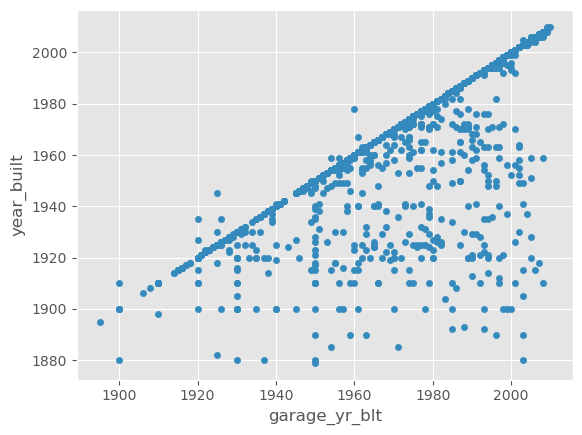

0.8344432354739171

In [277]:
# Plot Garage Year Built vs House Year Built
df.plot(x='garage_yr_blt', y='year_built', kind='scatter')
plt.show()

# check correlation
df.garage_yr_blt.corr(df.year_built)

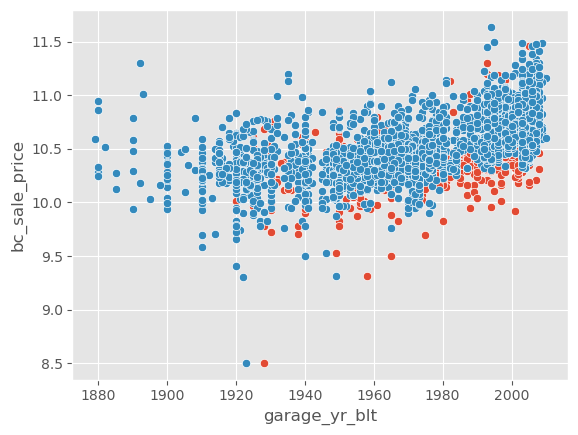

0.8344432354739171

In [278]:
# Plot Garage Year Built vs Sale Price
sns.scatterplot(data=df[~df['garage_yr_blt'].isna()], x='garage_yr_blt', y='bc_sale_price')
sns.scatterplot(data=df[~df['garage_yr_blt'].isna()], x='year_built', y='bc_sale_price')
plt.show()
    
# check correlation
df.garage_yr_blt.corr(df.year_built)

In [279]:
# dropping column due to it's strong correlation with House Year Built
df.drop('garage_yr_blt', axis=1, inplace=True)

# Outlier Handling

Look at boxplot of log sale price

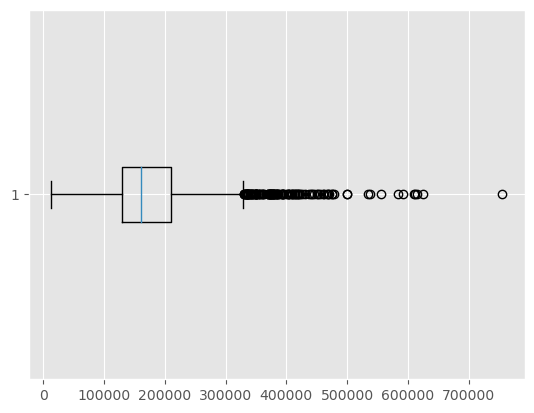

In [58]:
plt.boxplot(x = df['sale_price'], whis=1.5, vert=False)
plt.show()

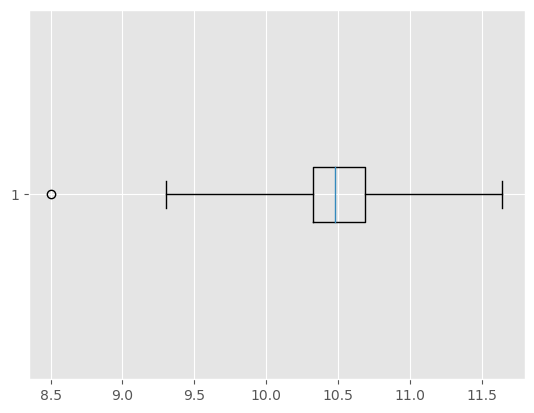

In [57]:
plt.boxplot(x = df['bc_sale_price'], whis=3, vert=False)
plt.show()

Removing the obvious outlier from the log price distribution

In [59]:
# df.drop(427, inplace=True)
df.loc[df.bc_sale_price < 9]

,pid,gr_liv_area,sale_price,ms_sub_class,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition1,condition2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior1st,exterior2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmt_fin_type1,bsmt_fin_sf1,bsmt_fin_type2,bsmt_fin_sf2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,kitchen_qual,tot_rms_abv_grd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3_ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,log_sale_price
427,902207130,832,12789,30,RM,68.0,9656,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,BrkTil,Fa,Fa,No,Unf,0.0,Unf,0.0,678.0,678.0,GasA,TA,N,SBrkr,832,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,Unf,2.0,780.0,Fa,Fa,N,0,0,0,0,0,0,NA,NA,NA,0,6,2010,WD,Abnorml,8.503977


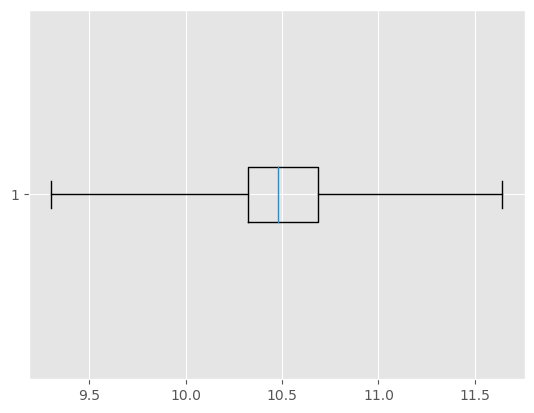

In [190]:
# replot box
plt.boxplot(x = df['bc_sale_price'], whis=3, vert=False)
plt.show()

In [191]:
df.corr()['bc_sale_price'].sort_values(key=abs, ascending=False)

log_sale_price     1.000000
sale_price         0.951252
overall_qual       0.816554
gr_liv_area        0.719732
garage_cars        0.673277
garage_area        0.655088
total_bsmt_sf      0.644852
1st_flr_sf         0.626238
year_built         0.599156
full_bath          0.573684
year_remod_add     0.566210
fireplaces         0.505025
tot_rms_abv_grd    0.500629
mas_vnr_area       0.437650
bsmt_fin_sf1       0.436912
wood_deck_sf       0.337011
lot_frontage       0.324065
open_porch_sf      0.312602
half_bath          0.310594
bsmt_full_bath     0.284683
2nd_flr_sf         0.278021
lot_area           0.262979
pid               -0.237316
bedroom_abv_gr     0.196663
bsmt_unf_sf        0.182168
enclosed_porch    -0.140967
kitchen_abv_gr    -0.124052
screen_porch       0.119658
ms_sub_class      -0.072122
overall_cond      -0.058210
low_qual_fin_sf   -0.038888
3_ssn_porch        0.037766
pool_area          0.032511
bsmt_fin_sf2       0.029418
bsmt_half_bath    -0.022681
mo_sold            0

Plot Overall Quality vs Log Sale Price

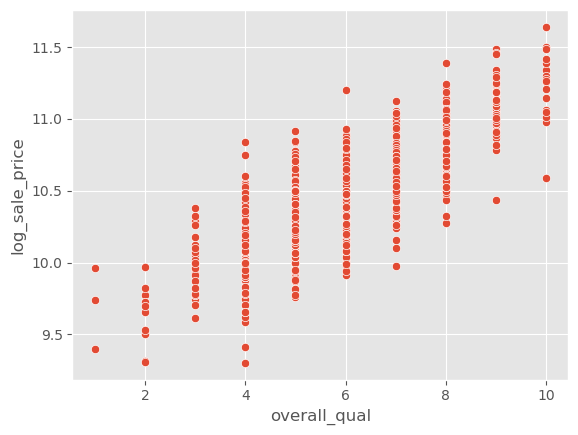

In [192]:
sns.scatterplot(data=df, x='overall_qual', y='bc_sale_price')
plt.show()

No obvious outliers

Plot Square Feet vs Log sale Price

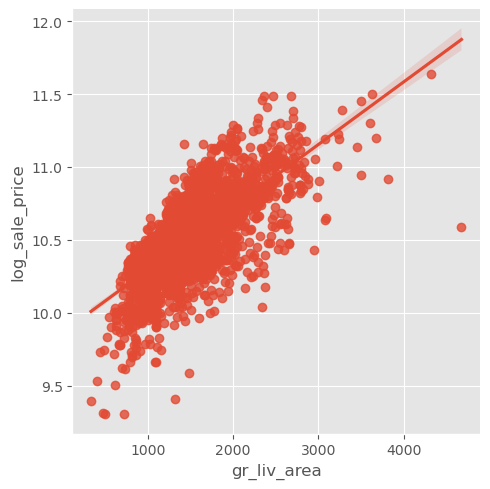

In [193]:
sns.lmplot(data=df, x = 'gr_liv_area', y='bc_sale_price')
plt.show()

Drop the obvious outlier

In [194]:
df.drop(309, inplace=True)

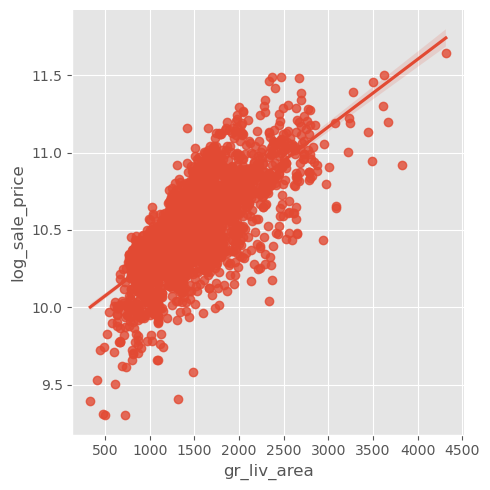

In [195]:
# replot
sns.lmplot(data=df, x = 'gr_liv_area', y='bc_sale_price')
plt.show()

In [280]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df

,pid,gr_liv_area,sale_price,ms_sub_class,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition1,condition2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior1st,exterior2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmt_fin_type1,bsmt_fin_sf1,bsmt_fin_type2,bsmt_fin_sf2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,kitchen_qual,tot_rms_abv_grd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3_ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,bc_sale_price
0,909176150,856,126000,30,RL,80.0,7890,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NA,NA,NA,0,3,2010,WD,Normal,10.299527
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NA,NA,NA,0,2,2009,WD,Normal,10.377252
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NA,Detchd,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NA,NA,NA,0,11,2007,WD,Normal,10.292822
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NA,Detchd,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NA,NA,NA,0,5,2009,WD,Normal,10.222923
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NA,NA,NA,0,11,2009,WD,Normal,10.746564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,903205040,952,121000,30,RL,65.0,8854,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,0,NA,NA,NA,0,5,2009,WD,Normal,10.268556
2575,905402060,1733,139600,20,RL,49.0,13680,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2009,WD,Normal,10.377798
2576,909275030,2002,145000,90,RH,82.0,6270,Pave,NA,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,284.0,Unf,0.0,717.0,1001.0,GasA,TA,N,FuseA,1001,1001,0,0.0,0.0,2,0,4,2,TA,8,Typ,0,NA,2Types,Unf,3.0,871.0,TA,TA,Y,0,0,

,pid,gr_liv_area,sale_price,ms_sub_class,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition1,condition2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior1st,exterior2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmt_fin_type1,bsmt_fin_sf1,bsmt_fin_type2,bsmt_fin_sf2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,kitchen_qual,tot_rms_abv_grd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3_ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,bc_sale_price
0,909176150,856,126000,30,RL,80.0,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,10.299527
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,10.377252
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,10.292822
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,10.222923
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,10.746564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,903205040,952,121000,30,RL,65.0,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal,10.268556
2575,905402060,1733,139600,20,RL,49.0,13680,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,10.377798
2576,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,284.0,Unf,0.0,717.0,1001.0,GasA,TA,N,FuseA,1001,1001,0,0.0,0.0,2,0,4,2,TA,8,Typ,